In [1]:
import pandas as pd 
import numpy as np 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

2024-09-23 17:47:52.366787: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-23 17:47:52.430288: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-23 17:47:52.431269: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-23 17:47:53.958959: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:

data = pd.read_excel("upper_shuffled_output.xlsx")
# Load your dataset (assuming it's in a pandas DataFrame called 'data')
X = data.drop(columns=['pH'])
y = data['pH']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model
model = Sequential()

# Input layer and two hidden layers
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))

# Output layer
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", test_loss)
print("Test MAE:", test_mae)


Epoch 1/100


2024-09-23 17:47:59.146739: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-09-23 17:47:59.147325: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


2561/2561 [==============================] - 6s 2ms/step - loss: 2.6515 - mae: 1.1834 - val_loss: 1.2998 - val_mae: 0.9950
Epoch 2/100
2561/2561 [==============================] - 5s 2ms/step - loss: 1.2146 - mae: 0.9557 - val_loss: 1.1504 - val_mae: 0.9344
Epoch 3/100
2561/2561 [==============================] - 5s 2ms/step - loss: 1.1103 - mae: 0.8948 - val_loss: 1.1228 - val_mae: 0.8968
Epoch 4/100
2561/2561 [==============================] - 5s 2ms/step - loss: 1.0229 - mae: 0.8458 - val_loss: 1.0402 - val_mae: 0.8660
Epoch 5/100
2561/2561 [==============================] - 10s 4ms/step - loss: 0.9801 - mae: 0.8221 - val_loss: 1.0064 - val_mae: 0.8373
Epoch 6/100
2561/2561 [==============================] - 7s 3ms/step - loss: 0.9467 - mae: 0.8071 - val_loss: 1.0118 - val_mae: 0.8421
Epoch 7/100
2561/2561 [==============================] - 7s 3ms/step - loss: 0.9288 - mae: 0.7998 - val_loss: 0.9465 - val_mae: 0.8169
Epoch 8/100
2561/2561 [==============================] - 9s 4ms/st

251/251 [==============================] - 3s 11ms/step
       Actual pH  Predicted pH
10138         10      8.380247
13088          7      7.438499
5567          10      9.548359
30901          7      8.419658
27607          8      8.305968


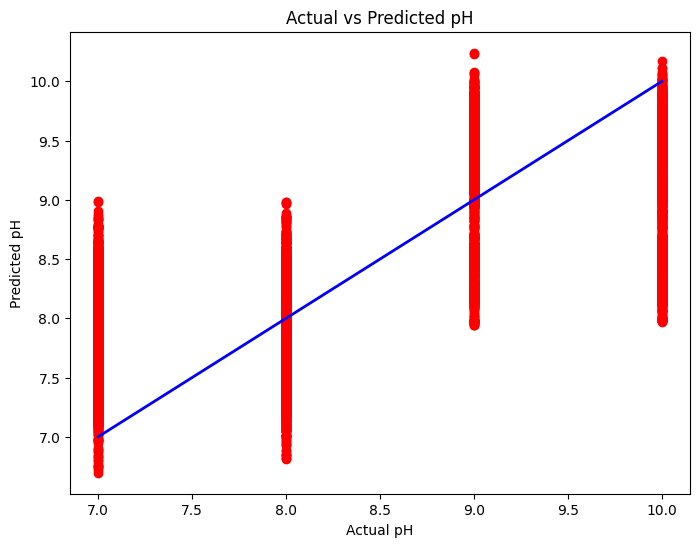

In [3]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Convert predictions and actual values into a DataFrame for easier comparison
comparison_df = pd.DataFrame({'Actual pH': y_test, 'Predicted pH': y_pred.flatten()})

# Display the first few rows of the comparison
print(comparison_df.head())

# Plot actual vs predicted values to visualize
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='r')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', linewidth=2)  # Line of perfect prediction
plt.title('Actual vs Predicted pH')
plt.xlabel('Actual pH')
plt.ylabel('Predicted pH')
plt.show()


In [4]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd 

# Assume data is already loaded into X (features) and y (target)
# Split data into train and test sets
data = pd.read_excel("upper_shuffled_output.xlsx")
# Load your dataset (assuming it's in a pandas DataFrame called 'data')
X = data.drop(columns=['pH'])
y = data['pH']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model-building function for Keras Tuner
def build_model(hp):
    model = Sequential()

    # Tune the number of units in the first layer
    model.add(Dense(units=hp.Int('units', min_value=5, max_value=50, step=2),
                    activation='relu', input_shape=(X_train_scaled.shape[1],)))

    # Tune the number of hidden layers
    for i in range(hp.Int('num_layers', 1, 3)):  # 1 to 3 hidden layers
        model.add(Dense(units=hp.Int(f'units_{i}', min_value=5, max_value=100, step=2),
                        activation='relu'))

    # Output layer
    model.add(Dense(1))

    # Tune the learning rate for Adam optimizer
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=0.1, sampling='log')
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='mean_squared_error',  # Since it's regression
                  metrics=['mae'])  # Mean Absolute Error
    
    return model

# Initialize the Keras Tuner with Random Search
tuner = kt.RandomSearch(
    build_model,                # Model-building function
    objective='val_loss',        # Target metric to optimize
    max_trials=10,               # Number of different hyperparameter combinations to try
    executions_per_trial=2,      # Number of times to train each model (to reduce variance)
    directory='tuner_results',   # Directory where the tuner logs will be saved
    project_name='pH_prediction' # Project name for logs
)

# Perform hyperparameter search
tuner.search(X_train_scaled, y_train, epochs=50, validation_split=0.2, verbose=1)

# Retrieve the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model on the test set
test_loss, test_mae = best_model.evaluate(X_test_scaled, y_test)
print("Test Loss:", test_loss)
print("Test MAE:", test_mae)

# Retrieve the best hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best hyperparameters:", best_hyperparameters.values)


Trial 6 Complete [00h 03m 07s]
val_loss: 0.7621303200721741

Best val_loss So Far: 0.7621303200721741
Total elapsed time: 00h 18m 29s

Search: Running Trial #7

Value             |Best Value So Far |Hyperparameter
15                |31                |units
3                 |2                 |num_layers
37                |7                 |units_0
0.012802          |0.0054495         |learning_rate
55                |25                |units_1
89                |45                |units_2

Epoch 1/50
801/801 [==============================] - 3s 2ms/step - loss: 1.7144 - mae: 1.0377 - val_loss: 2.1743 - val_mae: 1.2041
Epoch 2/50
801/801 [==============================] - 2s 2ms/step - loss: 1.1358 - mae: 0.8921 - val_loss: 0.9893 - val_mae: 0.8409
Epoch 3/50
801/801 [==============================] - 2s 2ms/step - loss: 1.0194 - mae: 0.8419 - val_loss: 0.9983 - val_mae: 0.8428
Epoch 4/50
801/801 [==============================] - 2s 2ms/step - loss: 0.9813 - mae: 0.8247 - val_loss:

KeyboardInterrupt: 

In [2]:
! pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 KB 1.2 MB/s eta 0:00:00a 0:00:01
You should consider upgrading via the '/home/ayyp/.pyenv/versions/3.8.16/bin/python3.8 -m pip install --upgrade pip' command.
